In [7]:
# -*- coding: utf-8 -*-
"""
@author: sarveswara rao
"""
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def plots(x, y, label):
    plt.xlabel("No of features")
    plt.ylabel(label)
    plt.plot(x, y, marker = 'o')
    plt.grid(True)
    plt.show()


 Churn
No     5174
Yes    1869
dtype: int64
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfe

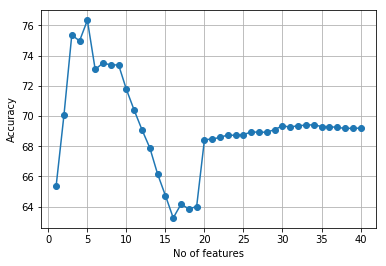

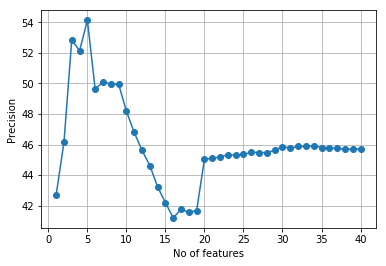

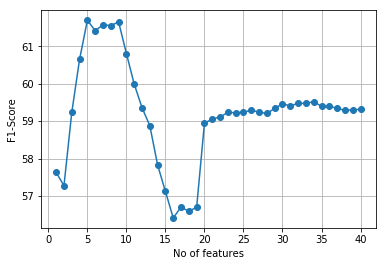

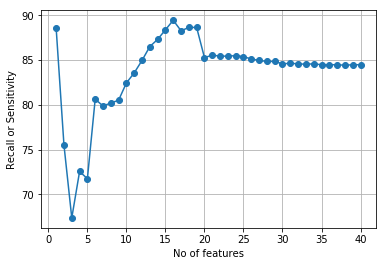

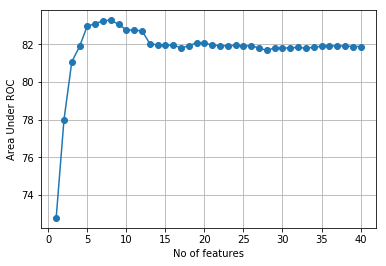

In [13]:
df = pd.read_csv('..//dataset//ibm_churn_prediction.csv')
print('\n', df.groupby('Churn').size())
np.random.seed(0)
# dropping all the missng values rows
missing = []
for i in range(7043):
    try:
        np.float(df['TotalCharges'][i])
    except:
        missing.append(i)
df = df.drop(missing)

# Dropping the customerID column as it is unique and has no significance in 
# Churn prediction
df = df.drop(columns = 'customerID')

# Changing the data-type of the total charges from object to float64
df['TotalCharges'] = df['TotalCharges'].astype(np.float64)

# Dividing the data into features set and target set
X = df.iloc[:, 0:19]	
y = df.iloc[:, 19]
y = pd.DataFrame(data = y, columns={'Churn'})

# Encoding of categorical values to numerical values
y['Churn'] = LabelEncoder().fit_transform(y['Churn'])
X['gender'] = LabelEncoder().fit_transform(X['gender'])
X['Partner'] = LabelEncoder().fit_transform(X['Partner'])
X['Dependents'] = LabelEncoder().fit_transform(X['Dependents'])
X['PhoneService'] = LabelEncoder().fit_transform(X['PhoneService'])
X['PaperlessBilling'] = LabelEncoder().fit_transform(X['PaperlessBilling'])

# Using one hot encoding for features having more than two possible categories
features = ['MultipleLines','InternetService','OnlineSecurity', 
        'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies','Contract', 'PaymentMethod']
X = pd.get_dummies(X, columns = features)

#Importing the new data to a csv file :)
print(X.columns,'\n')
# Standardizing the features
col_names = ['tenure', 'MonthlyCharges', 'TotalCharges']
features = X[col_names]
features = StandardScaler().fit_transform(features)
X[col_names] = features
y = np.ravel(y)

print("\n---------Features Vs Different evalution metrics---------\n")

from sklearn.feature_selection import SelectKBest, f_classif

k_values = []
for i in range(X.shape[1]):
    k_values.append(i+1)

p1 = []
p2 = []
p3 = []
p4 = []
p5 = []
for i in range(X.shape[1]):
    # Everytime we are seleting best k features from the dataset
    test = SelectKBest(score_func = f_classif, k = i+1)
    X_test = test.fit_transform(X, y)
    X_new = pd.DataFrame(X_test)

    clf = GaussianNB()#criterion = 'entropy', min_samples_split = 100)
    # using stratified k fold for equal class distribution in both training and test set
    accuracy = cross_val_score(clf, X_new, y,
                     scoring = 'accuracy', cv = StratifiedKFold(5))
    precision = cross_val_score(clf, X_new, y,
                     scoring = 'precision', cv = StratifiedKFold(5))
    f1 = cross_val_score(clf, X_new, y, 
                    scoring = 'f1', cv = StratifiedKFold(5))
    recall = cross_val_score(clf, X_new, y,
                    scoring = 'recall', cv = StratifiedKFold(5))
    auc = cross_val_score(clf, X_new, y,
                    scoring = 'roc_auc', cv = StratifiedKFold(5))

    p1.append(100*accuracy.mean())
    p2.append(100*precision.mean())
    p3.append(100*f1.mean())
    p4.append(100*recall.mean())
    p5.append(100*auc.mean())


plots(k_values, p1, 'Accuracy')
plots(k_values, p2, 'Precision')
plots(k_values, p3, 'F1-Score')
plots(k_values, p4, 'Recall or Sensitivity')
plots(k_values, p5, 'Area Under ROC')